# Importing The Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
%matplotlib inline

# Importing The Datasets

In [2]:
Stock_hdfc = pd.read_csv('HDFC_FINAL.csv',  index_col=0)

df_Stock_hdfc = Stock_hdfc
#df_Stock_hdfc = df_Stock_hdfc.rename(columns={'HDFC_Close(t)':'Close'})
df_Stock_hdfc.head()

,Open,High,Low,HDFC_Close(t),Volume,SD20,Upper_Band,Lower_Band,HDFC_Close(t-1),HDFC_Close(t-2),...,Week,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Is_leap_year,Year,Month
Date,,,,,,,,,,,,,,,,,,,,,
2011-09-16,243.125000,245.000000,238.149994,241.850006,5473504,6.762994,247.223489,220.171512,242.324997,239.449997,...,37,0,0,0,0,0,0,0,2011,9
2011-09-19,240.949997,243.500000,238.550003,242.375000,4194610,7.003161,248.262574,220.249928,241.850006,242.324997,...,38,0,0,0,0,0,0,0,2011,9
2011-09-20,242.500000,246.625000,241.500000,245.675003,5917634,7.383917,249.786585,220.250916,242.375000,241.850006,...,38,0,0,0,0,0,0,0,2011,9
2011-09-21,246.375000,248.824997,244.199997,247.250000,6445698,7.580813,251.216627,220.893376,245.675003,242.375000,...,38,0,0,0,0,0,0,0,2011,9
2011-09-22,243.949997,244.500000,232.750000,236.149994,5095544,7.431967,251.241435,221.513567,247.250000,245.675003,...,38,0,0,0,0,0,0,0,2011,9


In [3]:
Stock_bhpl = pd.read_csv('BHARAT_PETROLEUM_FINAL.csv',  index_col=0)

df_Stock_bhpl = Stock_bhpl
#df_Stock_bhpl = df_Stock_bhpl.rename(columns={'BHARAT_PETROLEUM_Close(t)':'Close'})
df_Stock_bhpl.head()

,Open,High,Low,BHARAT_PETROLEUM_Close(t),Volume,SD20,Upper_Band,Lower_Band,Bharat Petroleum_Close(t-1),Bharat Petroleum_Close(t-2),...,Week,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Is_leap_year,Year,Month
Date,,,,,,,,,,,,,,,,,,,,,
2011-09-16,229.846664,231.199997,223.486664,224.193329,8211097,4.114019,239.858038,223.401961,228.473328,231.059998,...,37,0,0,0,0,0,0,0,2011,9
2011-09-19,223.333328,223.800003,220.133331,220.653336,4992840,4.700258,240.309183,221.508149,224.193329,228.473328,...,38,0,0,0,0,0,0,0,2011,9
2011-09-20,220.000000,221.826660,217.353333,218.706665,8540872,5.246042,241.123084,220.138916,220.653336,224.193329,...,38,0,0,0,0,0,0,0,2011,9
2011-09-21,220.000000,222.266663,216.800003,218.026672,6039802,5.950725,241.989784,218.186882,218.706665,220.653336,...,38,0,0,0,0,0,0,0,2011,9
2011-09-22,215.866669,216.593338,213.466660,213.833328,4292655,6.854219,242.747436,215.330562,218.026672,218.706665,...,38,0,0,0,0,0,0,0,2011,9


In [6]:
Stock_cipla = pd.read_csv('CIPLA_FINAl.csv',  index_col=0)

df_Stock_cipla = Stock_cipla
#df_Stock_cipla = df_Stock_cipla.rename(columns={'CIPLA_Close(t)':'Close'})
df_Stock_cipla.head()

,Open,High,Low,CIPLA_Close(t),Volume,SD20,Upper_Band,Lower_Band,Cipla_Close(t-1),Cipla_Close(t-2),...,Week,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Is_leap_year,Year,Month
Date,,,,,,,,,,,,,,,,,,,,,
2011-09-16,284.000000,287.850006,281.549988,282.700012,706838,4.787974,292.563450,273.411553,284.049988,282.200012,...,37,0,0,0,0,0,0,0,2011,9
2011-09-19,283.500000,283.500000,274.649994,277.250000,1715520,4.939488,292.503978,272.746025,282.700012,284.049988,...,38,0,0,0,0,0,0,0,2011,9
2011-09-20,278.649994,283.000000,277.049988,282.399994,928700,4.906447,292.305397,272.679607,277.250000,282.700012,...,38,0,0,0,0,0,0,0,2011,9
2011-09-21,282.350006,285.899994,281.000000,283.500000,680118,4.587921,291.343344,272.991660,282.399994,277.250000,...,38,0,0,0,0,0,0,0,2011,9
2011-09-22,281.000000,284.200012,276.350006,277.750000,876968,4.692965,291.330931,272.559071,283.500000,282.399994,...,38,0,0,0,0,0,0,0,2011,9


In [7]:
Stock_coroml = pd.read_csv('COROMANDEL_FINAL.csv',  index_col=0)

df_Stock_coroml = Stock_coroml
#df_Stock_coroml = df_Stock_coroml.rename(columns={'coroml_Close(t)':'Close'})
df_Stock_coroml.head()

,Open,High,Low,COROMANDEL_Close(t),Volume,SD20,Upper_Band,Lower_Band,Coromandel_Close(t-1),Coromandel_Close(t-2),...,Week,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Is_leap_year,Year,Month
Date,,,,,,,,,,,,,,,,,,,,,
2011-09-16,315.299988,329.950012,307.450012,324.200012,409636,9.795728,326.703957,287.521046,306.399994,300.200012,...,37,0,0,0,0,0,0,0,2011,9
2011-09-19,318.000000,318.000000,308.700012,309.649994,62561,9.610628,326.033758,287.591245,324.200012,306.399994,...,38,0,0,0,0,0,0,0,2011,9
2011-09-20,314.500000,317.899994,310.000000,312.200012,64223,9.315916,325.136834,287.873170,309.649994,324.200012,...,38,0,0,0,0,0,0,0,2011,9
2011-09-21,314.850006,320.000000,309.000000,309.850006,104925,8.721751,323.393503,288.506500,312.200012,309.649994,...,38,0,0,0,0,0,0,0,2011,9
2011-09-22,306.750000,312.000000,302.100006,303.899994,32327,7.943061,320.966124,289.193879,309.850006,312.200012,...,38,0,0,0,0,0,0,0,2011,9


In [8]:
Stock_tcs = pd.read_csv('TCS_FINAL.csv',  index_col=0)

df_Stock_tcs = Stock_tcs
#df_Stock_tcs = df_Stock_tcs.rename(columns={'tcs_Close(t)':'Close'})
df_Stock_tcs.head()

,Open,High,Low,TCS_Close(t),Volume,SD20,Upper_Band,Lower_Band,TCS_Close(t-1),TCS_Close(t-2),...,Week,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Is_leap_year,Year,Month
Date,,,,,,,,,,,,,,,,,,,,,
2011-09-16,524.000000,536.200012,510.649994,513.875000,4656504,19.860088,538.351425,458.911072,520.875000,507.549988,...,37,0,0,0,0,0,0,0,2011,9
2011-09-19,510.750000,516.250000,506.250000,509.024994,2240234,19.545583,539.114916,460.932582,513.875000,520.875000,...,38,0,0,0,0,0,0,0,2011,9
2011-09-20,511.049988,532.000000,511.049988,528.974976,3487986,18.673109,540.594965,465.902529,509.024994,513.875000,...,38,0,0,0,0,0,0,0,2011,9
2011-09-21,533.974976,533.974976,518.450012,521.750000,2740760,15.918955,538.222908,474.547087,528.974976,509.024994,...,38,0,0,0,0,0,0,0,2011,9
2011-09-22,511.500000,517.000000,493.100006,497.200012,3141570,15.651254,538.007506,475.402492,521.750000,528.974976,...,38,0,0,0,0,0,0,0,2011,9


# Train Test Split

In [9]:
def create_train_test_set(df_Stock):
    
    features = df_Stock.drop(df_Stock.columns[3], axis=1)
    target = df_Stock.iloc[:,3]
    #df_Stock = df_Stock.drop(columns= ['Date_Col'], axis = 1, inplace = True)

    data_len = df_Stock.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.90)
    print('Training Set length - ', str(train_split))

    #test_split = train_split + int(data_len * 0.10)
    #print('Validat Set length - ', str(int(data_len * 0.1)))

    print('Testing Set length - ', str(int(data_len * 0.10)))

    # Splitting features and target into train, validation and test samples 
    X_train, X_test = features[:train_split], features[train_split:]
    Y_train, Y_test = target[:train_split], target[train_split:]

    #print shape of samples
    print(X_train.shape, X_test.shape)
    print(Y_train.shape, Y_test.shape)
    
    X_train.reset_index(inplace = True)
    X_train.drop(columns = ['Date','Date_Col'], axis= 1, inplace = True)
    
    X_test.reset_index(inplace = True)
    X_test.drop(columns = ['Date','Date_Col'], axis= 1, inplace = True)
    
    
    return X_train, X_test, Y_train, Y_test

In [10]:
X_train_hdfc, X_test_hdfc, Y_train_hdfc, Y_test_hdfc = create_train_test_set(df_Stock_hdfc)

Historical Stock Data length is -  2760
Training Set length -  2484
Testing Set length -  276
(2484, 63) (276, 63)
(2484,) (276,)


C:\Users\HP\AppData\Local\Temp\ipykernel_12660\2443111095.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns = ['Date','Date_Col'], axis= 1, inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_12660\2443111095.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns = ['Date','Date_Col'], axis= 1, inplace = True)


In [11]:
X_train_bhpl, X_test_bhpl, Y_train_bhpl, Y_test_bhpl = create_train_test_set(df_Stock_bhpl)

Historical Stock Data length is -  2760
Training Set length -  2484
Testing Set length -  276
(2484, 63) (276, 63)
(2484,) (276,)


C:\Users\HP\AppData\Local\Temp\ipykernel_12660\2443111095.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns = ['Date','Date_Col'], axis= 1, inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_12660\2443111095.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns = ['Date','Date_Col'], axis= 1, inplace = True)


In [12]:
X_train_cipla, X_test_cipla, Y_train_cipla, Y_test_cipla = create_train_test_set(df_Stock_cipla)

Historical Stock Data length is -  2760
Training Set length -  2484
Testing Set length -  276
(2484, 63) (276, 63)
(2484,) (276,)


C:\Users\HP\AppData\Local\Temp\ipykernel_12660\2443111095.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns = ['Date','Date_Col'], axis= 1, inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_12660\2443111095.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns = ['Date','Date_Col'], axis= 1, inplace = True)


In [13]:
X_train_coroml, X_test_coroml, Y_train_coroml, Y_test_coroml = create_train_test_set(df_Stock_coroml)

Historical Stock Data length is -  2760
Training Set length -  2484
Testing Set length -  276
(2484, 63) (276, 63)
(2484,) (276,)


C:\Users\HP\AppData\Local\Temp\ipykernel_12660\2443111095.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns = ['Date','Date_Col'], axis= 1, inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_12660\2443111095.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns = ['Date','Date_Col'], axis= 1, inplace = True)


In [14]:
X_train_tcs, X_test_tcs, Y_train_tcs, Y_test_tcs = create_train_test_set(df_Stock_tcs)

Historical Stock Data length is -  2760
Training Set length -  2484
Testing Set length -  276
(2484, 63) (276, 63)
(2484,) (276,)


C:\Users\HP\AppData\Local\Temp\ipykernel_12660\2443111095.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns = ['Date','Date_Col'], axis= 1, inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_12660\2443111095.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns = ['Date','Date_Col'], axis= 1, inplace = True)


# Model Fitting

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
def rf_Regression(X_train, Y_train, X_test, Y_test):
    
    
    rf = RandomForestRegressor(n_estimators=100, max_depth=50, random_state=42)
    rf.fit(X_train, Y_train.values)

    Y_train_pred = rf.predict(X_train)
    Y_test_pred = rf.predict(X_test)
    print("Training R-squared: ",round(metrics.r2_score(Y_train.values,Y_train_pred),2))
    print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train.values,Y_train_pred), 2)) 
    print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train.values,Y_train_pred)),2))
    print("Training MAE: ",round(metrics.mean_absolute_error(Y_train.values,Y_train_pred),2))
    
    print(' ')

    print("Testing R-squared: ",round(metrics.r2_score(Y_test.values,Y_test_pred),2))
    print('Testing Mean Squared Error:', round(metrics.mean_squared_error(Y_test.values,Y_test_pred), 2)) 
    print("Testing RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test.values,Y_test_pred)),2))
    print("Testing MAE: ",round(metrics.mean_absolute_error(Y_test.values,Y_test_pred),2))
    
    print(' ')
    
    df_pred = pd.DataFrame(Y_test.values, columns=['Actual'], index=Y_test.index)
    df_pred['Predicted'] = Y_test_pred
    df_pred = df_pred.reset_index()
    df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')
    
    df_pred[['Actual', 'Predicted']].plot(figsize = (12,8))
    
    return df_pred

### HDFC

Training R-squared:  1.0
Training Mean Squared Error: 5.6
Training RMSE:  2.37
Training MAE:  1.35
 
Testing R-squared:  0.98
Testing Mean Squared Error: 154.12
Testing RMSE:  12.41
Testing MAE:  8.95
 


,Date,Actual,Predicted
0,2021-10-20,1673.849976,1677.898997
1,2021-10-21,1676.300049,1675.045001
2,2021-10-22,1680.750000,1675.006501
3,2021-10-25,1657.000000,1672.241509
4,2021-10-26,1652.750000,1675.981506
...,...,...,...
271,2022-11-23,1599.150024,1608.104989
272,2022-11-24,1625.150024,1648.921006
273,2022-11-25,1617.650024,1649.896509
274,2022-11-28,1600.250000,1625.261500


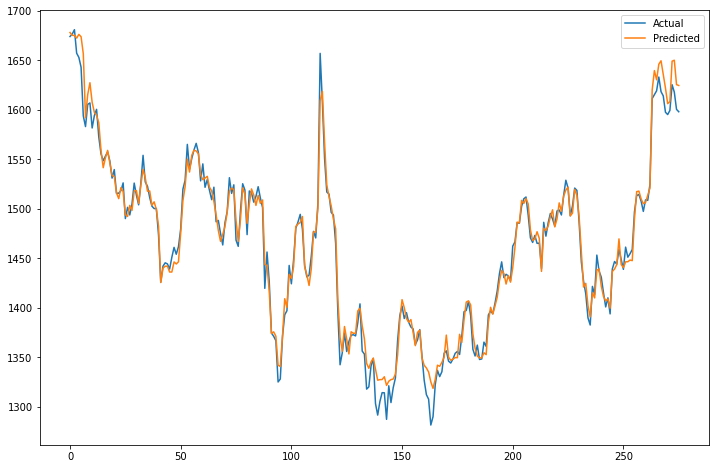

In [17]:
rf_Regression(X_train_hdfc, Y_train_hdfc, X_test_hdfc, Y_test_hdfc)

### Bharat Petrolium

Training R-squared:  1.0
Training Mean Squared Error: 0.17
Training RMSE:  0.41
Training MAE:  0.27
 
Testing R-squared:  0.99
Testing Mean Squared Error: 0.38
Testing RMSE:  0.62
Testing MAE:  0.48
 


,Date,Actual,Predicted
0,2021-10-20,72.900002,71.844333
1,2021-10-21,71.550003,70.530333
2,2021-10-22,69.300003,69.758500
3,2021-10-25,68.699997,68.640166
4,2021-10-26,71.650002,70.956834
...,...,...,...
271,2022-11-23,74.949997,75.683999
272,2022-11-24,74.800003,75.249666
273,2022-11-25,81.949997,80.105999
274,2022-11-28,81.400002,82.012500


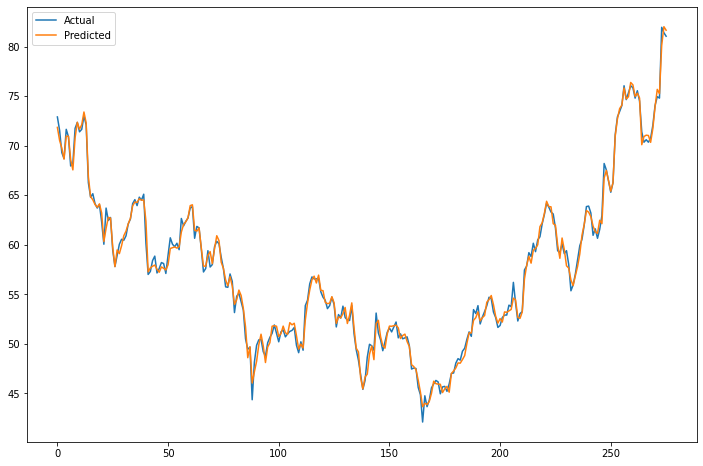

In [18]:
rf_Regression(X_train_bhpl, Y_train_bhpl, X_test_bhpl, Y_test_bhpl)

### Cipla

Training R-squared:  1.0
Training Mean Squared Error: 2.2
Training RMSE:  1.48
Training MAE:  1.01
 
Testing R-squared:  0.3
Testing Mean Squared Error: 4143.62
Testing RMSE:  64.37
Testing MAE:  38.99
 


,Date,Actual,Predicted
0,2021-10-20,905.900024,905.441001
1,2021-10-21,911.549988,908.613998
2,2021-10-22,896.349976,898.250003
3,2021-10-25,901.849976,900.260500
4,2021-10-26,907.500000,910.618499
...,...,...,...
271,2022-11-23,1108.000000,981.078500
272,2022-11-24,1095.349976,980.207001
273,2022-11-25,1105.349976,981.357500
274,2022-11-28,1101.750000,980.942000


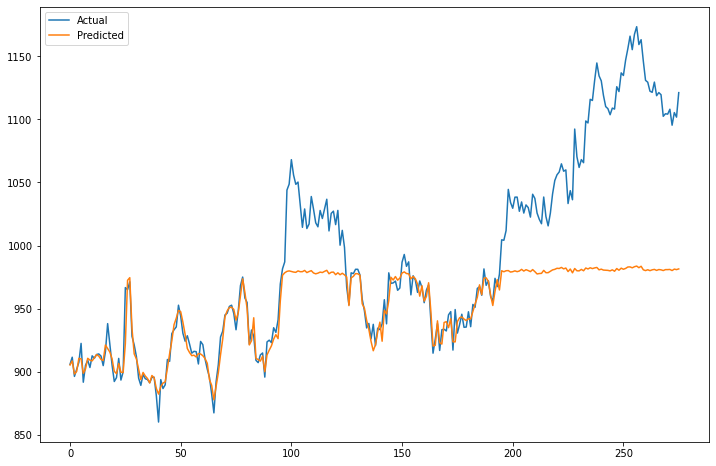

In [19]:
rf_Regression(X_train_cipla, Y_train_cipla, X_test_cipla, Y_test_cipla)

### Coromandel

Training R-squared:  1.0
Training Mean Squared Error: 2.74
Training RMSE:  1.66
Training MAE:  0.99
 
Testing R-squared:  0.63
Testing Mean Squared Error: 4059.98
Testing RMSE:  63.72
Testing MAE:  40.36
 


,Date,Actual,Predicted
0,2021-10-20,835.500000,835.183504
1,2021-10-21,830.650024,838.909006
2,2021-10-22,824.250000,833.742499
3,2021-10-25,814.150024,800.388010
4,2021-10-26,807.900024,810.821501
...,...,...,...
271,2022-11-23,902.750000,898.090001
272,2022-11-24,901.250000,897.854001
273,2022-11-25,920.349976,899.922001
274,2022-11-28,918.650024,899.418500


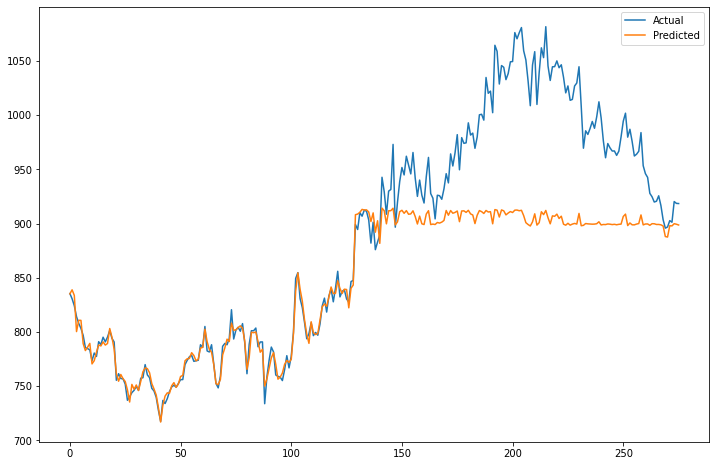

In [20]:
rf_Regression(X_train_coroml, Y_train_coroml, X_test_coroml, Y_test_coroml)

### TCS

Training R-squared:  1.0
Training Mean Squared Error: 22.45
Training RMSE:  4.74
Training MAE:  2.76
 
Testing R-squared:  0.78
Testing Mean Squared Error: 13501.76
Testing RMSE:  116.2
Testing MAE:  91.17
 


,Date,Actual,Predicted
0,2021-10-20,3608.850098,3634.714451
1,2021-10-21,3532.500000,3620.107446
2,2021-10-22,3498.850098,3611.185449
3,2021-10-25,3492.949951,3608.772947
4,2021-10-26,3482.600098,3597.344956
...,...,...,...
271,2022-11-23,3308.300049,3444.368977
272,2022-11-24,3380.149902,3453.357480
273,2022-11-25,3389.649902,3470.594480
274,2022-11-28,3395.250000,3505.345964


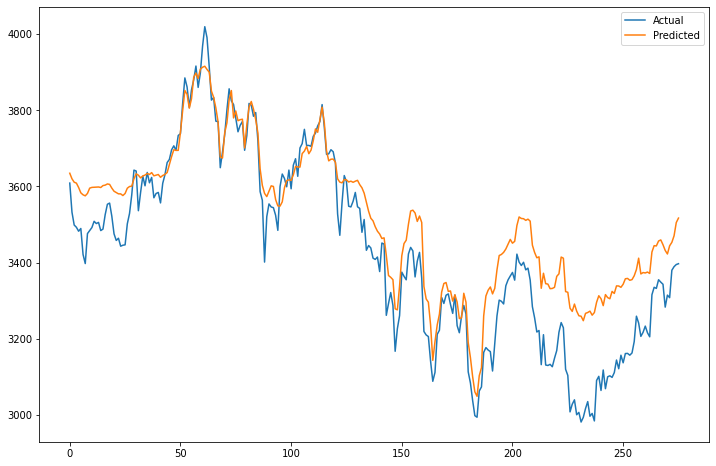

In [21]:
rf_Regression(X_train_tcs, Y_train_tcs, X_test_tcs, Y_test_tcs)